## 導入模組

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
#data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 導入cifar10的資料並整理

In [2]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
#讀cifar10資料
(x_train, y_train0), (x_test, y_test0) = datasets.cifar10.load_data()

#標準化
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

#Onehot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

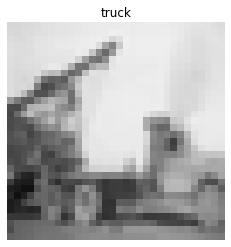

In [4]:
idx = np.random.randint(x_train.shape[0])
x_sample = x_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

## 建立卷積神經網路 

#### 卷積層filter數量改為9,81,243，全連接層神經元改為66

In [5]:
CNN_layers = [Conv2D(9,(3,3), input_shape=(32,32,3), padding='same',activation='relu',name='Conv_1'),
              MaxPool2D(),
              Conv2D(81,(3,3),padding='same',activation='relu',name='Conv_2'),
              MaxPool2D(),
              Conv2D(243,(3,3),padding='same',activation='relu',name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=66, activation='relu'),
             Dense(units=10, activation='softmax')]

In [6]:
model=Sequential(CNN_layers+FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 9)         252       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 9)         0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 81)        6642      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 81)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 243)         177390    
_________________________________________________________________
global_average_pooling2d (Gl (None, 243)               0         
_________________________________________________________________
dense (Dense)                (None, 66)                1

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

## 訓練 

#### batchsize改為123 epochs為3

In [8]:
model.fit(x_train, y_train, batch_size=123, epochs=3,validation_data=(x_test, y_test))

Epoch 1/3
407/407 [==============================] - 38s 94ms/step - loss: 1.9066 - categorical_accuracy: 0.2764 - val_loss: 1.7411 - val_categorical_accuracy: 0.3359
Epoch 2/3
407/407 [==============================] - 38s 92ms/step - loss: 1.6373 - categorical_accuracy: 0.3926 - val_loss: 1.5346 - val_categorical_accuracy: 0.4306
Epoch 3/3
407/407 [==============================] - 36s 88ms/step - loss: 1.5185 - categorical_accuracy: 0.4439 - val_loss: 1.4830 - val_categorical_accuracy: 0.4633


## 觀察準確率

In [10]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 3s 8ms/step - loss: 1.4830 - categorical_accuracy: 0.4633
Train Accuracy: 46.02600038051605
Test Accuracy: 46.32999897003174


## Transfer learning

## 導入cifar100的資料並整理

In [11]:
#讀cifar100資料
(u_train, v_train0), (u_test, v_test0) = datasets.cifar100.load_data()

#標準化
u_train = u_train / u_train.max()
u_test = u_test / u_test.max()

#Onehot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

## 用Frozen的方式訓練

#### 新增cifar100的全連接層，神經元分別為123,87,100

In [12]:
for layer in CNN_layers:
    layer.trainable = False

In [13]:
FC_layers_CF100 = [Dense(units=123, activation='relu'),
                   Dense(units=87, activation='relu'),
                   Dense(units=100, activation='softmax')]

In [14]:
model_CF100=Sequential(CNN_layers+FC_layers_CF100)

In [15]:
model_CF100.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 9)         252       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 9)         0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 81)        6642      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 81)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 243)         177390    
_________________________________________________________________
global_average_pooling2d (Gl (None, 243)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 123)              

In [16]:
model_CF100.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

## 訓練

In [17]:
model_CF100.fit(u_train,v_train,batch_size=123, epochs=3,validation_data=(u_test, v_test))

Epoch 1/3
407/407 [==============================] - 13s 31ms/step - loss: 3.9871 - categorical_accuracy: 0.0870 - val_loss: 3.7064 - val_categorical_accuracy: 0.1220
Epoch 2/3
407/407 [==============================] - 12s 30ms/step - loss: 3.6255 - categorical_accuracy: 0.1370 - val_loss: 3.5840 - val_categorical_accuracy: 0.1451
Epoch 3/3
407/407 [==============================] - 12s 29ms/step - loss: 3.5211 - categorical_accuracy: 0.1543 - val_loss: 3.4820 - val_categorical_accuracy: 0.1623


## 查看準確率

In [18]:
score_train = model_CF100.evaluate(u_train, v_train)
score_test = model_CF100.evaluate(u_test, v_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 2s 8ms/step - loss: 3.4820 - categorical_accuracy: 0.1623
Train Accuracy: 16.516000032424927
Test Accuracy: 16.23000055551529


## 查看舊模型準確率是否受影響

#### 舊模型表現不變，因為訓練方式使用frozen，沒有再將借來的網路重新訓練

In [20]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 3s 8ms/step - loss: 1.4830 - categorical_accuracy: 0.4633
Train Accuracy: 46.02600038051605
Test Accuracy: 46.32999897003174
